<a href="https://www.kaggle.com/code/pratisthachakraborty/fork-of-final?scriptVersionId=232942063" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

***Loading the RAVDESS Dataset****

In [1]:
from IPython.display import Audio, display

#Define the path to your audio file
audio_file_path = "/kaggle/input/ravedess-dataset/Ravedess dataset/Actor_01/03-01-01-01-01-02-01.wav"


#Set the sample rate
sr = 22050

# Display the audio
display(Audio(filename=audio_file_path, rate=sr))

***Display of waveform***

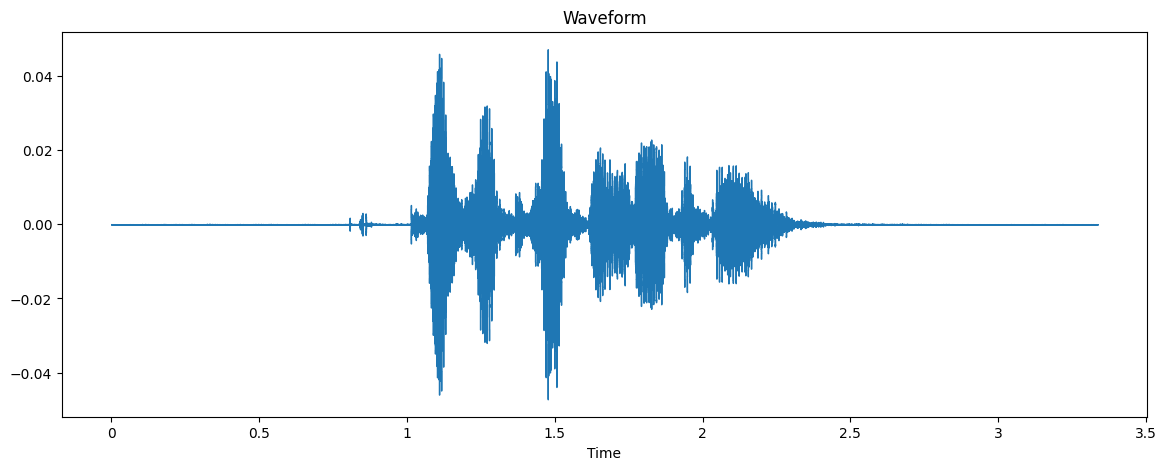

In [2]:
#Install these libraries first
#!pip install librosa
#pip install resampy

import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load(audio_file_path, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()

In [3]:
!pip uninstall -y resampy

In [4]:
!pip uninstall -y librosa

Found existing installation: librosa 0.10.2.post1
Uninstalling librosa-0.10.2.post1:
  Successfully uninstalled librosa-0.10.2.post1


**Installation**

In [5]:
!pip install librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 4.7 MB/s eta 0:00:0000:01


In [6]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.1 MB/s eta 0:00:0000:0100:01


**MFCC EXATRACTION**

In [ ]:
# Install resampy first (force reinstall to avoid lazy loading issue)
!pip install --upgrade --no-cache-dir resampy

# Manually restart kernel in Kaggle
import os
os._exit(00)  # Restart Kernel to apply changes (Kaggle specific)

# Re-import all necessary libraries
import numpy as np
import librosa
import resampy  # Ensure resampy is imported before librosa
import os

print("Resampy and Librosa imported successfully!")

# Function to extract MFCC features from audio files
def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    try:
        print(f"Processing: {file_path}")  # Debugging print
        y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')  # Load audio
        if y is None or len(y) == 0:
            print(f"Warning: Empty audio file - {file_path}")
            return None
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # Compute MFCCs
        mfccs_mean = np.mean(mfccs.T, axis=0)  # Get the mean of MFCCs
        return mfccs_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None  # Return None to avoid crashes

# Define the path to your dataset (ensure this path is correct for Kaggle)
dataset_path = "/kaggle/input/ravedess-dataset/Ravedess dataset/"

# List to store extracted MFCC features
mfcc_features = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)
            mfccs = extract_mfcc(file_path)  # Extract MFCCs
            if mfccs is not None:  # Avoid storing None values
                try:
                    file_class = int(file[7:8]) - 1  # Extract class from filename
                    mfcc_features.append((mfccs, file_class))
                except ValueError:
                    print(f"Skipping file {file}: Unable to extract class label")

# Check if the extraction worked
if len(mfcc_features) == 0:
    print("Error: No MFCC features extracted. Check dataset path and filenames.")
else:
    print(f"Extracted {len(mfcc_features)} files")
    for i in range(min(5, len(mfcc_features))):  # Print the first 5 valid entries
        print(mfcc_features[i])


In [2]:
import os
import numpy as np
import librosa
import joblib

# Ensure feature extraction is performed before saving
if 'mfcc_features' not in globals() or len(mfcc_features) == 0:
    print("Feature extraction was not completed. Running extraction now...")

    dataset_path = "/kaggle/input/ravedess-dataset/Ravedess dataset/"

    # Ensure dataset path exists
    if not os.path.exists(dataset_path):
        print(f"Error: Dataset path '{dataset_path}' not found.")
    else:
        mfcc_features = []  # Initialize list

        def extract_mfcc(file_path, sr=22050, n_mfcc=40):
            """Extracts MFCC features from an audio file."""
            try:
                y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
                if len(y) == 0:
                    print(f"Warning: Empty audio file - {file_path}")
                    return None
                mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
                return np.mean(mfccs.T, axis=0)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                return None

        for root, _, files in os.walk(dataset_path):
            for file in files:
                if file.endswith('.wav'):
                    file_path = os.path.join(root, file)
                    mfccs = extract_mfcc(file_path)
                    if mfccs is not None:
                        try:
                            file_class = int(file[7:8]) - 1  # Extract class from filename
                            mfcc_features.append((mfccs, file_class))
                        except ValueError:
                            print(f"Skipping file {file}: Invalid filename format.")

        if len(mfcc_features) == 0:
            print("Error: No valid MFCC features extracted.")
        else:
            print(f"Feature extraction complete. {len(mfcc_features)} samples extracted.")

# Now proceed to save the extracted features
if len(mfcc_features) > 0:
    x, y = zip(*mfcc_features)
    x, y = np.asarray(x), np.asarray(y) 
    print(f"x shape: {x.shape}, y shape: {y.shape}")

    # Define the directory path to save the arrays
    SAVE_DIR_PATH = '/kaggle/working/'  # Kaggle's working directory
    os.makedirs(SAVE_DIR_PATH, exist_ok=True)

    # Save the arrays to files using joblib
    joblib.dump(x, os.path.join(SAVE_DIR_PATH, 'x.joblib'))
    joblib.dump(y, os.path.join(SAVE_DIR_PATH, 'y.joblib'))

    print("Saved 'x.joblib' and 'y.joblib' successfully!")
else:
    print("Feature extraction failed. No data to save.")


x shape: (1440, 40), y shape: (1440,)
Saved 'x.joblib' and 'y.joblib' successfully!


**Building the Convolutional Neural Network Model**

In [3]:
from tensorflow.keras. layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras. layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras. layers import Activation
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [4]:
model = Sequential()

model.add(Conv1D (64, 5, padding='same', input_shape=(40,1)))
model.add(Activation ('relu'))
model.add(Dropout (0.2))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 40, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 40, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │          20,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,872 (81.53 KB)

 Trainable params: 20,872 (81.53 KB)

 Non-trainable params: 0 (0.00 B)

**Training and Testing the Speech Emotion Recognition Model**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.shape)

x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

print(x_traincnn.shape, x_testcnn. shape)

(1008, 40)
(1008, 40, 1) (432, 40, 1)


In [6]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


#Compile the model with the RMSProp optimizer
model.compile(optimizer = RMSprop(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Train the model for 70 epochs
history = model.fit(x_traincnn, y_train, epochs=70, batch_size=32, validation_data=(x_testcnn, y_test), callbacks=[early_stopping])

#Evaluate the model
y_pred = model.predict(x_testcnn)
y_pred_classes = np.argmax(y_pred, axis=1)

#Print evaluation metrics
print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))

Epoch 1/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.1405 - loss: 20.5296 - val_accuracy: 0.1204 - val_loss: 6.0244
Epoch 2/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1251 - loss: 9.6830 - val_accuracy: 0.1157 - val_loss: 2.9253
Epoch 3/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1470 - loss: 8.1140 - val_accuracy: 0.1250 - val_loss: 2.6844
Epoch 4/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1700 - loss: 7.8584 - val_accuracy: 0.1713 - val_loss: 2.3663
Epoch 5/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1601 - loss: 7.3399 - val_accuracy: 0.1319 - val_loss: 2.4423
Epoch 6/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1804 - loss: 7.3911 - val_accuracy: 0.2245 - val_loss: 2.2528
Epoch 7/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1635 - loss: 6.6684 - val_accuracy: 0.2269 - val_loss: 2.2472
Epoch 8/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1178 - loss: 6.8339 - val_accuracy: 0.2083 - val_los

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


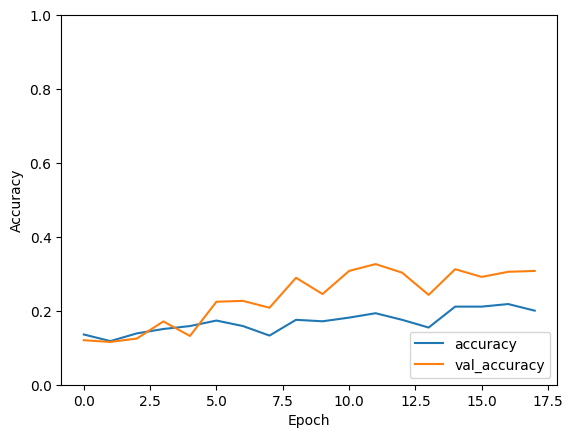

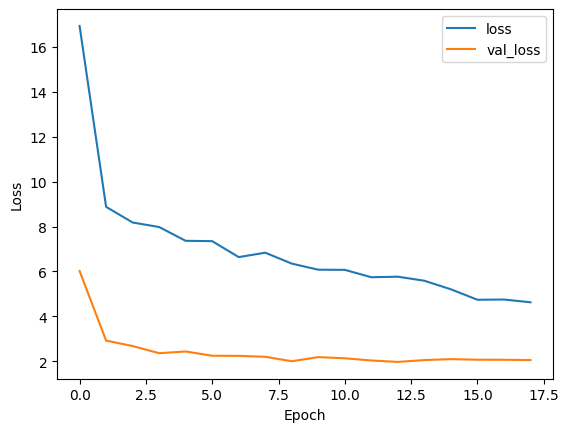

In [7]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

**Preparing an Augmented Dataset**

In [8]:
import os
from glob import glob
import pickle
import itertools
import matplotlib.pyplot as plt
from PIL import Image
import IPython
from IPython.display import Audio
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import librosa

In [9]:
#RAVDESS Database #ignore CALM
label_dict_ravdess = {'02': 'NEU', '03': 'HAP', '04': 'SAD', '05': 'ANG', '06': 'FEA', '07': 'DIS', '08': 'SUR'}

def set_label_ravdess (audio_file, gender):
    label = label_dict_ravdess.get(audio_file[6:-16])
    if gender == True:
        if int(audio_file[18:-4])%2 == 0:
            label = 'f_' + label
        if int(audio_file[18:-4])%2 == 1:
            label = 'm_' + label
    return label

In [10]:
file_path = '/kaggle/input/ravedess-dataset/Ravedess dataset/'
file_names = os.listdir(file_path)

signal = []
labels = []

sample_rate = 16000
max_pad_len = 49100 #3 seconds worth of audio

for actor_folder in file_names:
    for audio_index, audio_file in enumerate (os.listdir(os.path.join(file_path, actor_folder))):
        if audio_file[6:-16] in list(label_dict_ravdess.keys()):
            # Librosa read audio file
            y, sr = librosa.core.load(os.path.join(file_path, actor_folder, audio_file), 
                                      sr=sample_rate, offset=0.5)
            # Normalization
            y = zscore(y)
            #Padding

            if len(y) < max_pad_len:
                y_padded = np.zeros(max_pad_len)
                y_padded[:len(y)] = y
                y = y_padded
            elif len(y) > max_pad_len:
                y = np.asarray(y[:max_pad_len])
            signal.append(y)
            labels.append(set_label_ravdess (audio_file, False))

labels = np.asarray (labels).ravel()

print(f"Number of audio files imported: {labels.shape[0]}")

Number of audio files imported: 1344


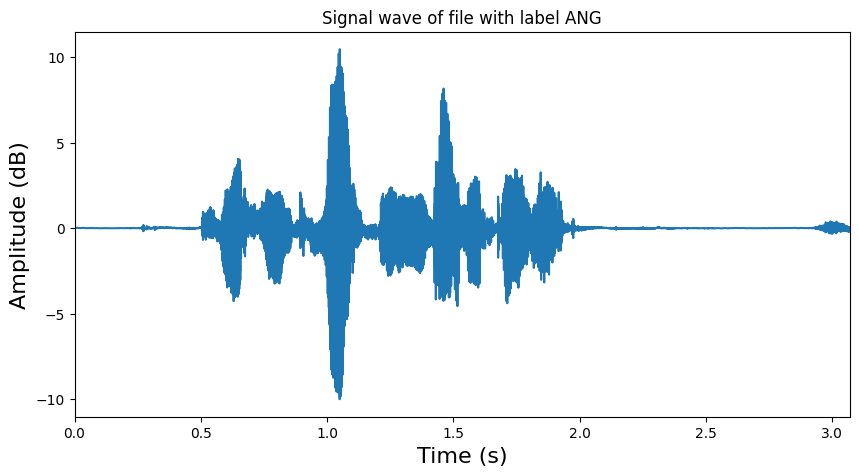

Audio file 'ANG':


In [11]:
#Select one random audio file
random_idx= np.random.randint(len(labels))
random_label = labels[random_idx]
random_signal = signal [random_idx]

#Plot signal wave
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(random_signal))/float(sample_rate), random_signal)
plt.xlim((np.arange(len(random_signal))/float(sample_rate)) [0], (np.arange(len(random_signal))/float(sample_rate)) [-1])
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Amplitude (dB)', fontsize=16)
plt.title(f"Signal wave of file with label {random_label}")
plt.show()

#Play audio file
print(f"Audio file '{random_label}':")
Audio(random_signal, rate=sample_rate)

**Signal-to-Noise Ratios (SNR)**

In [12]:
import numpy as np
# Number of augmented data
nb_augmented = 2

# Function to add noise to a signals with a desired Signal Noise ratio (SNR)
def noisy_signal(signal, snr_low=15, snr_high=30, nb_augmented=2):

    signal_len = len(signal)
    noise = np.random.normal(size=(nb_augmented, signal_len))

    # Compute signal and noise power
    s_power = np.sum((signal / (2.0 ** 15)) ** 2) / signal_len
    n_power = np.sum((noise / (2.0 ** 15)) ** 2, axis=1) / signal_len
    snr = np.random.randint(snr_low, snr_high)

    # Compute K coeff for each noise
    K = np.sqrt((s_power / n_power) * 10 ** (- snr / 10))
    K = np.ones((signal_len, nb_augmented)) * K

    return signal + K.T * noise

augmented_signal = list(map(noisy_signal, signal))



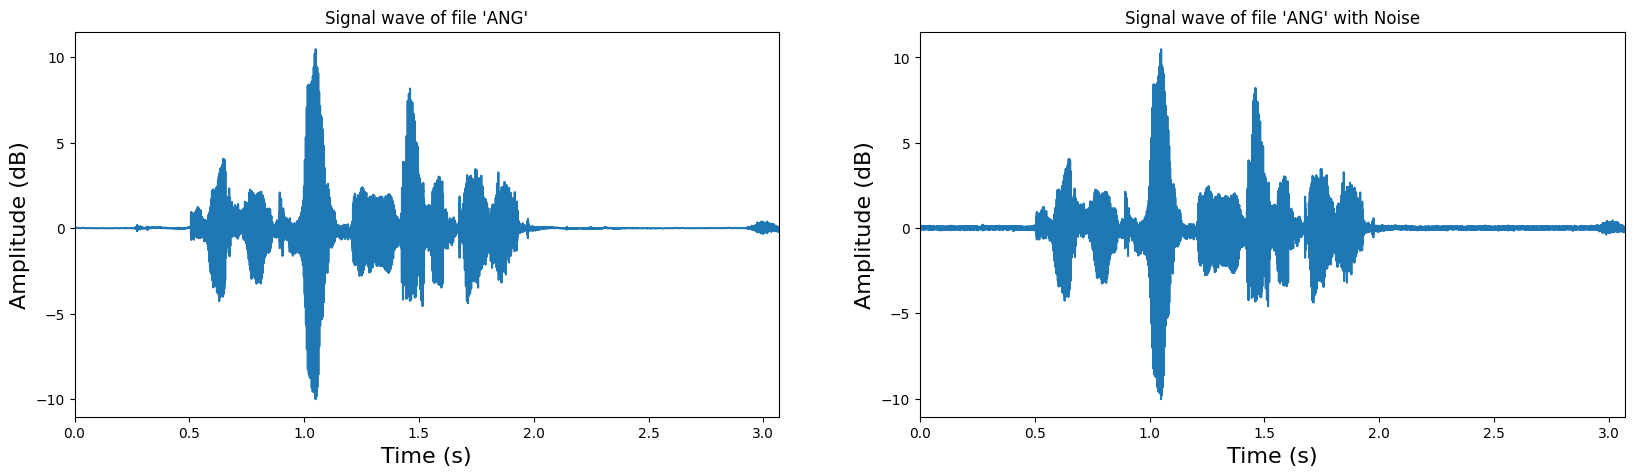

Audio file 'ANG':


Audio file 'ANG' with noise:


In [13]:
# Plot signal wave
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(np.arange(len(random_signal))/float(sample_rate), random_signal)
time_axis = np.arange(len(random_signal)) / float(sample_rate)
plt.xlim(time_axis[0], time_axis[-1])
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Amplitude (dB)", fontsize=16)
plt.title(f"Signal wave of file '{random_label}'")

# Plot signal wave with noise
plt.subplot(1,2,2)
plt.plot(np.arange(len(random_signal))/float(sample_rate), augmented_signal[random_idx][0])
time_axis = np.arange(len(random_signal)) / float(sample_rate)
plt.xlim(time_axis[0], time_axis[-1])
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Amplitude (dB)", fontsize=16)
plt.title(f"Signal wave of file '{random_label}' with Noise")
plt.show()

# Play audio file
print(f"Audio file '{random_label}':")
IPython.display.display(Audio(random_signal, rate=sample_rate))

# Play same audio file with noise
print(f"Audio file '{random_label}' with noise:")
IPython.display.display(Audio(augmented_signal[random_idx][0], rate=sample_rate))


In [14]:
def mel_spectrogram (y, sr=16000, n_fft=512, win_length=256,hop_length=128, window='hamming', n_mels=128, fmax=4000):

    y = np.asarray(y, dtype=np.float32)
    # Compute Mel spectrogram
    mel_feat = np.abs(librosa.stft(y, n_fft=n_fft, window=window,
                                    win_length=win_length, hop_length=hop_length)) ** 2

    mel_feat = librosa.feature.melspectrogram(S=mel_feat, sr=sr, n_mels=n_mels, fmax=fmax)

    mel_feat = librosa.power_to_db(mel_feat, ref=np.max)

    return mel_feat

signal = np.array(signal, dtype=np.float32)

#add noise to the audio signals in "signal"
augmented_signal = np.array([noisy_signal(audio) for audio in signal], dtype=np.float32)

# get the Mel spectogram for all the audio
mel_spect = np.array([mel_spectrogram(audio) for audio in signal])
noisy_mel_spect = [mel_spectrogram(augmented_signal[i]) for i in range(len(augmented_signal))]

In [16]:
import numpy as np
import itertools
from sklearn.model_selection import train_test_split

# Convert lists to NumPy arrays if not already
mel_spect = np.array(mel_spect, dtype=np.float32)
noisy_mel_spect = np.array(noisy_mel_spect, dtype=np.float32)
labels = np.array(labels)

# Train-test split
org_mel_spec_train, org_mel_spec_test, noisy_mel_spec_train, noisy_mel_spec_test, label_train, label_test = \
    train_test_split(mel_spect, noisy_mel_spect, labels, test_size=0.2, random_state=42)

#Print shapes before fixing
print(f"Original Mel Spec Train Shape: {org_mel_spec_train.shape}")
print(f"Noisy Mel Spec Train Shape: {noisy_mel_spec_train.shape}")

#Keep only the first augmentation (Simple approach)
noisy_mel_spec_train = noisy_mel_spec_train[:, 0, :, :]

#Ensure shape is now correct
print(f"Fixed Noisy Mel Spec Train Shape: {noisy_mel_spec_train.shape}")

#ENSURE: Both arrays have the same shape before concatenation
if org_mel_spec_train.shape != noisy_mel_spec_train.shape:
    raise ValueError(f"Shape mismatch: {org_mel_spec_train.shape} vs {noisy_mel_spec_train.shape}")

# Augment labels
nb_augmented = noisy_mel_spec_train.shape[0] // len(label_train)
aug_label_train = np.asarray(list(itertools.chain.from_iterable([[label] * nb_augmented for label in label_train])))

#Ensure labels match augmented data
if len(noisy_mel_spec_train) != len(aug_label_train):
    raise ValueError(f"Mismatch: Noisy data {len(noisy_mel_spec_train)} vs Augmented labels {len(aug_label_train)}")

#Concatenate both datasets
X_train = np.concatenate((org_mel_spec_train, noisy_mel_spec_train), axis=0)
y_train = np.concatenate((label_train, aug_label_train), axis=0)

X_test = np.array(org_mel_spec_test)
y_test = np.array(label_test)

# 🔹 Print final dataset shapes
print(f"Final X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Final X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Original Mel Spec Train Shape: (1075, 128, 384)
Noisy Mel Spec Train Shape: (1075, 2, 128, 384)
Fixed Noisy Mel Spec Train Shape: (1075, 128, 384)
Final X_train shape: (2150, 128, 384), y_train shape: (2150,)
Final X_test shape: (269, 128, 384), y_test shape: (269,)


In [17]:
import numpy as np
# Fix `noisy_mel_spec_train` shape
noisy_mel_spec_train = np.array(noisy_mel_spec_train)  # Ensure it's a numpy array
if len(noisy_mel_spec_train.shape) == 2:  # If missing one dimension
    noisy_mel_spec_train = noisy_mel_spec_train.reshape(org_mel_spec_train.shape[0], org_mel_spec_train.shape[1], org_mel_spec_train.shape[2])

# Fix `aug_label_train` if needed
aug_label_train = np.asarray(list(itertools.chain.from_iterable([[label] * min(nb_augmented, 10) for label in label_train])))

# Verify before concatenation
print("Org Train Shape:", org_mel_spec_train.shape)
print("Noisy Train Shape:", noisy_mel_spec_train.shape)
print("Label Train Shape:", label_train.shape)
print("Augmented Label Shape:", aug_label_train.shape)

# Concatenation (after verification)
X_train = np.concatenate((org_mel_spec_train, noisy_mel_spec_train))
y_train = np.concatenate((label_train, aug_label_train))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

# Final Check
assert X_train.shape[0] == y_train.shape[0], "Mismatch in sample sizes!"


Org Train Shape: (1075, 128, 384)
Noisy Train Shape: (1075, 128, 384)
Label Train Shape: (1075,)
Augmented Label Shape: (1075,)
(2150, 128, 384)
(269, 128, 384)
(2150,)


In [18]:
import numpy as np

def frame(x, step_size, window):
    # x shape: (samples, channels, time, height, width)
    num_samples, height, time_steps = x.shape
    n_frames = max(1, 1 + (time_steps - window) // step_size)

    frames = np.zeros((num_samples, n_frames, height, window, 1), dtype=np.float32)

    for t in range(n_frames):
        start = t * step_size
        end = start + window
        # if end > total_time:
        #     break
        frames[:, t, :, :, 0] = x[:, :, start:end]

    return frames


In [19]:
# First, ensure X_train and X_test are loaded or created
# Then apply the framing
window_size = 128
gap = 64

if X_test.ndim == 4:
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[3])

X_train = frame(X_train, gap, window_size)
X_test = frame(X_test, gap, window_size)

print("Framed X_train shape:", X_train.shape)
print("Framed X_test shape:", X_test.shape)


Framed X_train shape: (2150, 5, 128, 128, 1)
Framed X_test shape: (269, 5, 128, 128, 1)


In [20]:
import os

input_root = "/kaggle/input/ravedess-dataset/Ravedess dataset"

if os.path.exists(input_root):
    print("Dataset found!")
    print(os.listdir(input_root))  # List contents
else:
    print("Dataset NOT found. Check the path!")


Dataset found!
['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']


In [21]:
import os
import shutil  #Missing import
import random  #Missing import

# Set paths
input_root = "/kaggle/input/ravedess-dataset/Ravedess dataset"
output_train = "/kaggle/working/ravedess-dataset/train"  #Corrected output path
output_test = "/kaggle/working/ravedess-dataset/test"  #Corrected output path

# Ensure train & test directories exist
os.makedirs(output_train, exist_ok=True)
os.makedirs(output_test, exist_ok=True)

# Iterate over each actor's folder
for actor_folder in os.listdir(input_root):
    actor_path = os.path.join(input_root, actor_folder)
    
    if os.path.isdir(actor_path):  # Check if it's a directory
        audio_files = [f for f in os.listdir(actor_path) if f.endswith(('.wav', '.mp3', '.flac'))]

        # Shuffle and split
        random.seed(42)  # For reproducibility
        random.shuffle(audio_files)

        split_index = int(0.8 * len(audio_files))  # 80% split
        train_files = audio_files[:split_index]
        test_files = audio_files[split_index:]

        # Create corresponding actor subdirectories in train & test
        train_actor_path = os.path.join(output_train, actor_folder)
        test_actor_path = os.path.join(output_test, actor_folder)

        os.makedirs(train_actor_path, exist_ok=True)
        os.makedirs(test_actor_path, exist_ok=True)

        # Copy files instead of moving (since input folder is read-only)
        for file in train_files:
            shutil.copy(os.path.join(actor_path, file), os.path.join(train_actor_path, file))

        for file in test_files:
            shutil.copy(os.path.join(actor_path, file), os.path.join(test_actor_path, file))

        print(f"Processed {actor_folder}: {len(train_files)} train, {len(test_files)} test")

print("Splitting complete! 🚀")


Processed Actor_02: 48 train, 12 test
Processed Actor_17: 48 train, 12 test
Processed Actor_05: 48 train, 12 test
Processed Actor_16: 48 train, 12 test
Processed Actor_21: 48 train, 12 test
Processed Actor_01: 48 train, 12 test
Processed Actor_11: 48 train, 12 test
Processed Actor_20: 48 train, 12 test
Processed Actor_08: 48 train, 12 test
Processed Actor_15: 48 train, 12 test
Processed Actor_06: 48 train, 12 test
Processed Actor_12: 48 train, 12 test
Processed Actor_23: 48 train, 12 test
Processed Actor_24: 48 train, 12 test
Processed Actor_22: 48 train, 12 test
Processed Actor_04: 48 train, 12 test
Processed Actor_19: 48 train, 12 test
Processed Actor_10: 48 train, 12 test
Processed Actor_09: 48 train, 12 test
Processed Actor_14: 48 train, 12 test
Processed Actor_03: 48 train, 12 test
Processed Actor_13: 48 train, 12 test
Processed Actor_18: 48 train, 12 test
Processed Actor_07: 48 train, 12 test
Splitting complete! 🚀


**Building the CNN-LSTM model**

In [22]:
import os
from glob import glob
import pickle
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, TimeDistributed
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import LSTM, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder

In [23]:
lb = LabelEncoder()

y_all = np.concatenate((y_train, y_test), axis=0)
lb.fit(np.ravel(y_all))

y_train = to_categorical(lb.fit_transform(np.ravel(y_train)))
y_test = to_categorical(lb.transform(np.ravel(y_test)))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3], -1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3], -1)

In [24]:
input_y = Input(shape = X_train.shape[1:], name='Input')

#CNN 64
y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_1')(input_y)
y = TimeDistributed(BatchNormalization(), name ='BatchNorm_1')(y)
y = TimeDistributed(Activation('elu'), name='Activ_1')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'), name='MaxPool_1') (y)
y = TimeDistributed(Dropout (0.2), name='Drop_1')(y)

In [25]:
#CNN 64
y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides = (1, 1), padding='same'), name='Conv_2') (y)
y = TimeDistributed(BatchNormalization(), name = 'BatchNorm_2')(y)
y = TimeDistributed(Activation('elu'), name = 'Activ_2')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides = (4, 4), padding='same'), name='MaxPool_2')(y)
y = TimeDistributed(Dropout(0.1), name ='Drop_2')(y)

#CNN 128
y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_3') (y)
y = TimeDistributed(BatchNormalization(), name = 'BatchNorm_3')(y)
y = TimeDistributed(Activation('elu'), name = 'Activ_3')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides = (4, 4), padding='same'), name='MaxPool_3')(y)
y = TimeDistributed(Dropout(0.1), name ='Drop_3')(y)

#second CNN 128
y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_4') (y)
y = TimeDistributed(BatchNormalization(), name = 'BatchNorm_4')(y)
y = TimeDistributed(Activation('elu'), name = 'Activ_4')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides = (4, 4), padding='same'), name='MaxPool_4')(y)
y = TimeDistributed(Dropout(0.2), name ='Drop_4')(y)


In [26]:
# 🔹 Ensure labels are properly formatted
num_classes = 7  

#Fix label shape
if len(y_train.shape) == 3:  
    y_train = np.argmax(y_train, axis=-1)  # Flatten the labels
    y_test = np.argmax(y_test, axis=-1)

#Convert to one-hot encoding (Only if not already one-hot)
y_train = tf.keras.utils.to_categorical(y_train[:len(X_train)], num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test[:len(X_test)], num_classes=num_classes)

#Reshape if needed
if len(y_train.shape) > 2:
    y_train = y_train.reshape(-1, num_classes)
if len(y_test.shape) > 2:
    y_test = y_test.reshape(-1, num_classes)
    
# 🔹 Print shape to verify
print("Final y_train shape:", y_train.shape)  # Should be (None, 7)
print(X_train.shape)

Final y_train shape: (15050, 7)
(2150, 5, 128, 128, 1)


In [27]:
#Flatten
y = TimeDistributed(Flatten(), name='Flat')(y)

# LSTM part
y = LSTM(32, return_sequences=False, dropout=0.3, name='LSTM_1')(y)
y = Dense(y_train.shape[1], activation='softmax', name='FC') (y)

In [28]:
model = Model(inputs=input_y, outputs=y)

model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 5, 128, 128, 1)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_1 (TimeDistributed)             │ (None, 5, 128, 128, 64)     │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm_1 (TimeDistributed)        │ (None, 5, 128, 128, 64)     │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Activ_1 (TimeDistributed)            │ (None, 5, 128, 128, 64)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_1 (TimeDistributed)          │ (None, 5, 64, 64, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop_1 (TimeDistributed)             │ (None, 5, 64, 64, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_2 (TimeDistributed)             │ (None, 5, 64, 64, 64)       │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm_2 (TimeDistributed)        │ (None, 5, 64, 64, 64)       │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Activ_2 (TimeDistributed)            │ (None, 5, 64, 64, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_2 (TimeDistributed)          │ (None, 5, 16, 16, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop_2 (TimeDistributed)             │ (None, 5, 16, 16, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_3 (TimeDistributed)             │ (None, 5, 16, 16, 128)      │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm_3 (TimeDistributed)        │ (None, 5, 16, 16, 128)      │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Activ_3 (TimeDistributed)            │ (None, 5, 16, 16, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_3 (TimeDistributed)          │ (None, 5, 4, 4, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop_3 (TimeDistributed)             │ (None, 5, 4, 4, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_4 (TimeDistributed)             │ (None, 5, 4, 4, 128)        │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm_4 (TimeDistributed)        │ (None, 5, 4, 4, 128)        │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Activ_4 (TimeDistributed)            │ (None, 5, 4, 4, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_4 (TimeDistributed)          │ (None, 5, 1, 1, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop_4 (TimeDistributed)             │ (None, 5, 1, 1, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 281,383 (1.07 MB)

 Trainable params: 280,615 (1.07 MB)

 Non-trainable params: 768 (3.00 KB)

**Training and Testing the CNN-LSTM Network**

In [29]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.optimizers import SGD, schedules
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [30]:
# Define decay schedule for learning rate
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100000,  
    decay_rate=0.99,  
    staircase=True
)

In [31]:
print("X_train shape:", X_train.shape)  # Should be (2150, 5, 128, 128, 1)
print("y_train shape:", y_train.shape)  # Should be (2150, num_classes

X_train shape: (2150, 5, 128, 128, 1)
y_train shape: (15050, 7)


In [32]:
y_train = y_train[:X_train.shape[0]]
y_test = y_test[:X_test.shape[0]]


In [33]:
print("Final X_train shape:", X_train.shape)
print("Final y_train shape:", y_train.shape)
print("Final y_test shape:", y_test.shape)


Final X_train shape: (2150, 5, 128, 128, 1)
Final y_train shape: (2150, 7)
Final y_test shape: (269, 7)


In [34]:
model = Sequential([
    Input(shape=(5, 128, 128, 1)),

    TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D((2, 2))),
    
    TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D((2, 2))),
    
    TimeDistributed(Flatten()),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])


In [35]:
# Compile the model
#model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.8), 
              #loss='categorical_crossentropy',
              #metrics=['accuracy'])
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2150, 5, 128, 128, 1)
y_train shape: (2150, 7)
X_test shape: (269, 5, 128, 128, 1)
y_test shape: (269, 7)


In [37]:
# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1, mode='max')

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=35,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/35
68/68 ━━━━━━━━━━━━━━━━━━━━ 45s 526ms/step - accuracy: 0.8142 - loss: 0.9388 - val_accuracy: 0.8587 - val_loss: 0.6950
Epoch 2/35
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 508ms/step - accuracy: 0.8697 - loss: 0.6878 - val_accuracy: 0.8587 - val_loss: 0.5736
Epoch 3/35
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 510ms/step - accuracy: 0.8559 - loss: 0.6355 - val_accuracy: 0.8587 - val_loss: 0.5119
Epoch 4/35
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 511ms/step - accuracy: 0.8586 - loss: 0.5553 - val_accuracy: 0.8587 - val_loss: 0.4729
Epoch 5/35
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 511ms/step - accuracy: 0.8702 - loss: 0.4955 - val_accuracy: 0.8587 - val_loss: 0.4520
Epoch 6/35
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 512ms/step - accuracy: 0.8535 - loss: 0.5140 - val_accuracy: 0.8587 - val_loss: 0.4399
Epoch 7/35
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 512ms/step - accuracy: 0.8488 - loss: 0.5049 - val_accuracy: 0.8587 - val_loss: 0.4331
Epoch 8/35
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 512ms/step - accuracy: 0.8439 - loss: 0.5056 - val_accu

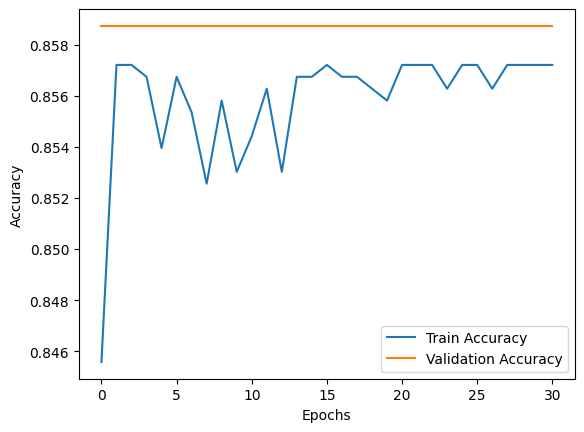

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
